In [ ]:
#pip install rdflib requests


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


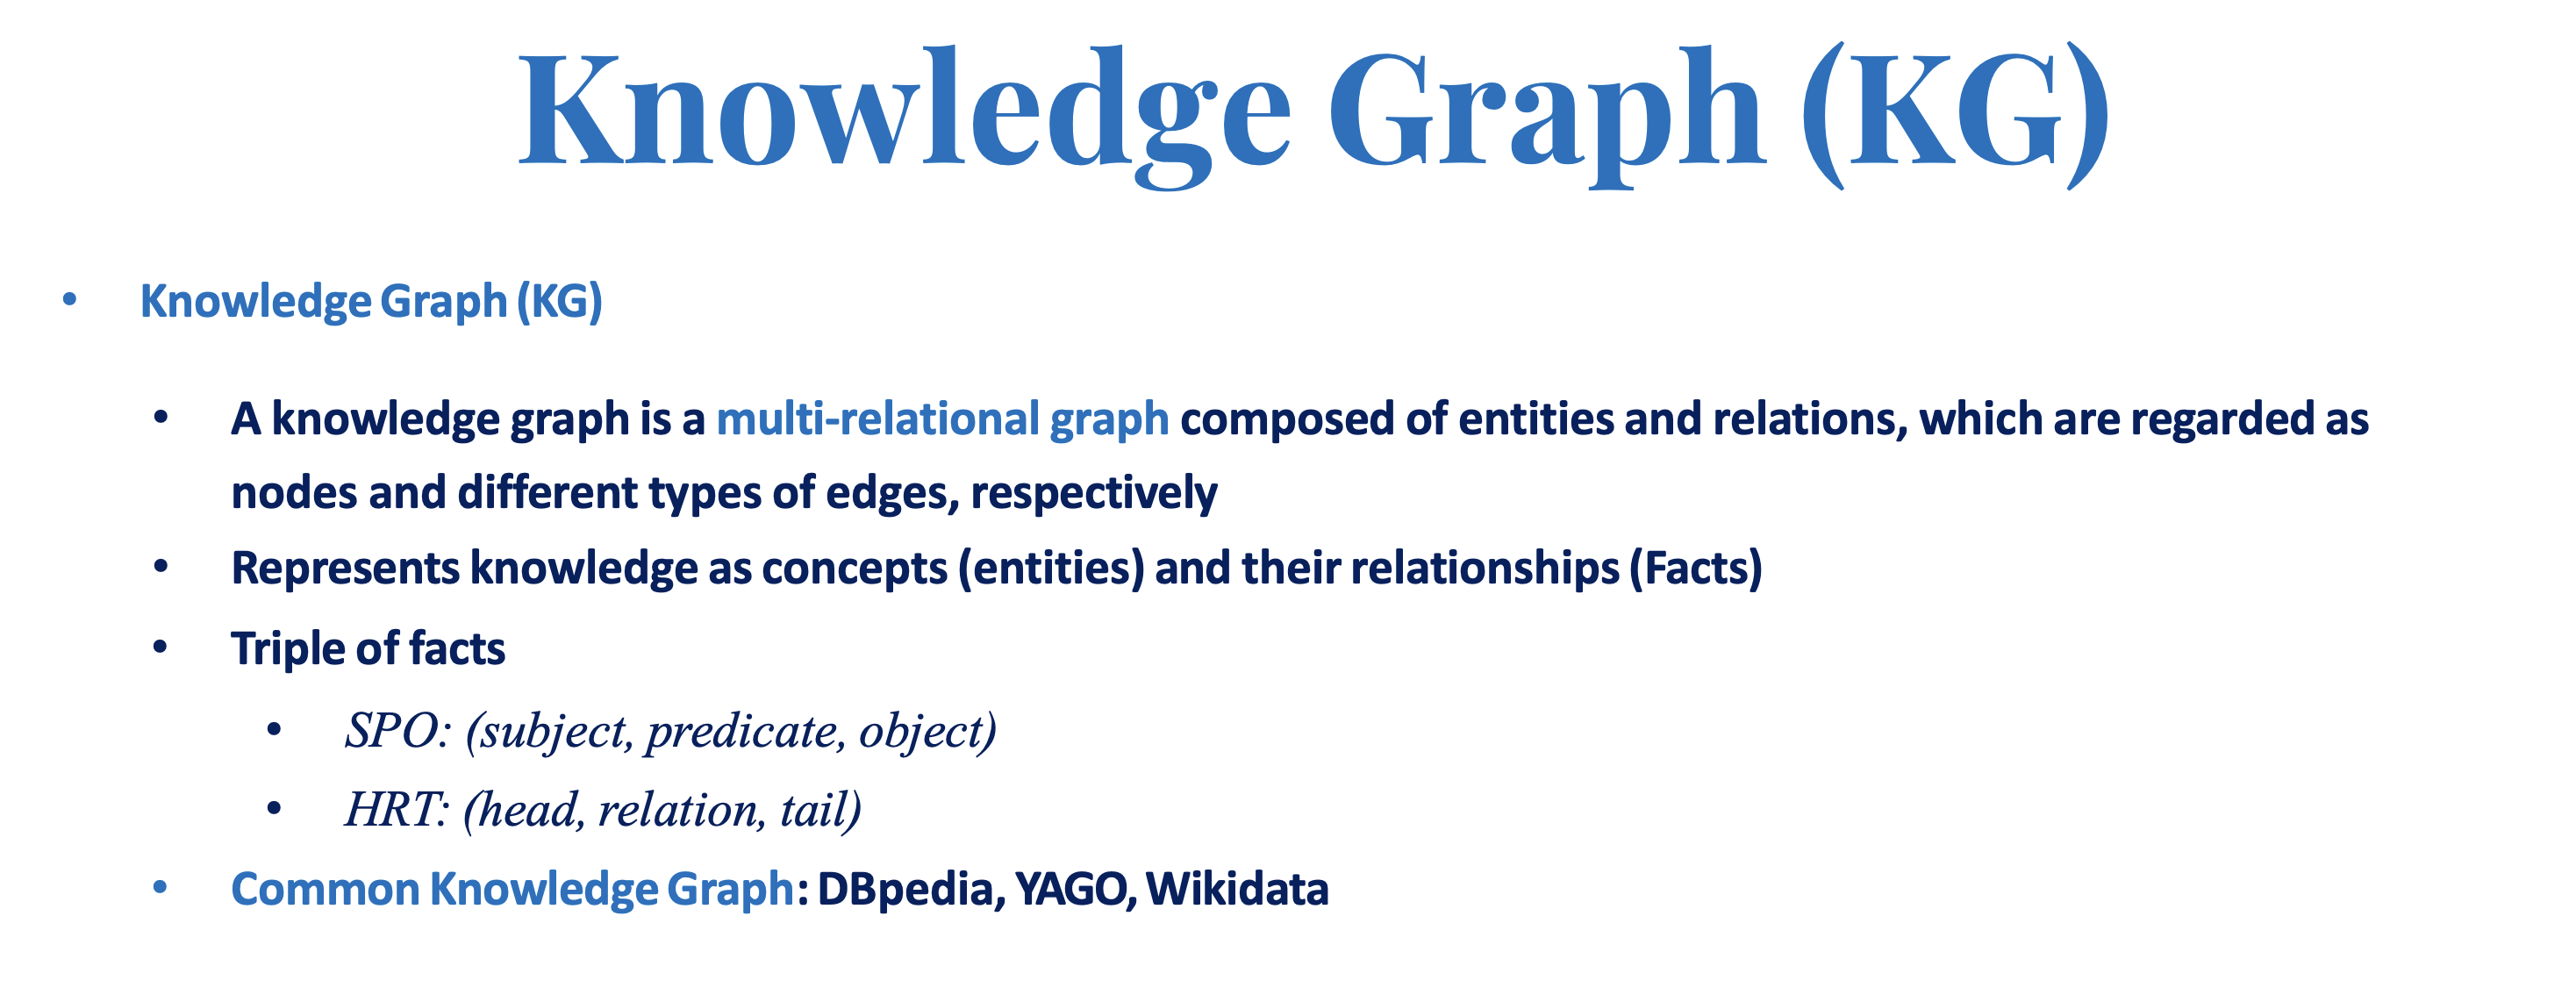

## Build our first SKG

In [2]:
from rdflib import Graph, Namespace, Literal, RDF, URIRef

working_directory ="/Users/sujoy/Documents"
# Create a namespace for your healthcare use-case
SKG = Namespace("http://demo.com/ns#")

# Initialize RDF graph
g = Graph()

# Create entities
patient = URIRef(SKG["Patient_123"])
doctor = URIRef(SKG["Doctor_456"])
treatment = URIRef(SKG["Treatment_789"])
diagnosis = URIRef(SKG["Diagnosis_A"])

# Define relationships
g.add((patient, RDF.type, SKG.Patient))
g.add((patient, SKG.hasName, Literal("John Doe")))
g.add((patient, SKG.hasDiagnosis, diagnosis))

g.add((doctor, RDF.type, SKG.Doctor))
g.add((doctor, SKG.hasName, Literal("Dr. Jane Smith")))
g.add((doctor, SKG.providesTreatment, treatment))

g.add((treatment, RDF.type, SKG.Treatment))
g.add((treatment, SKG.treatsDiagnosis, diagnosis))
g.add((treatment, SKG.hasName, Literal("Physical Therapy")))

g.add((diagnosis, RDF.type, SKG.Diagnosis))
g.add((diagnosis, SKG.diagnosisName, Literal("Lower Back Pain")))

# Save the RDF graph
g.serialize(destination=f"{working_directory}/healthcare_skg.ttl", format="turtle")
print("RDF SKG created successfully!")


RDF SKG created successfully!


## Visualize it
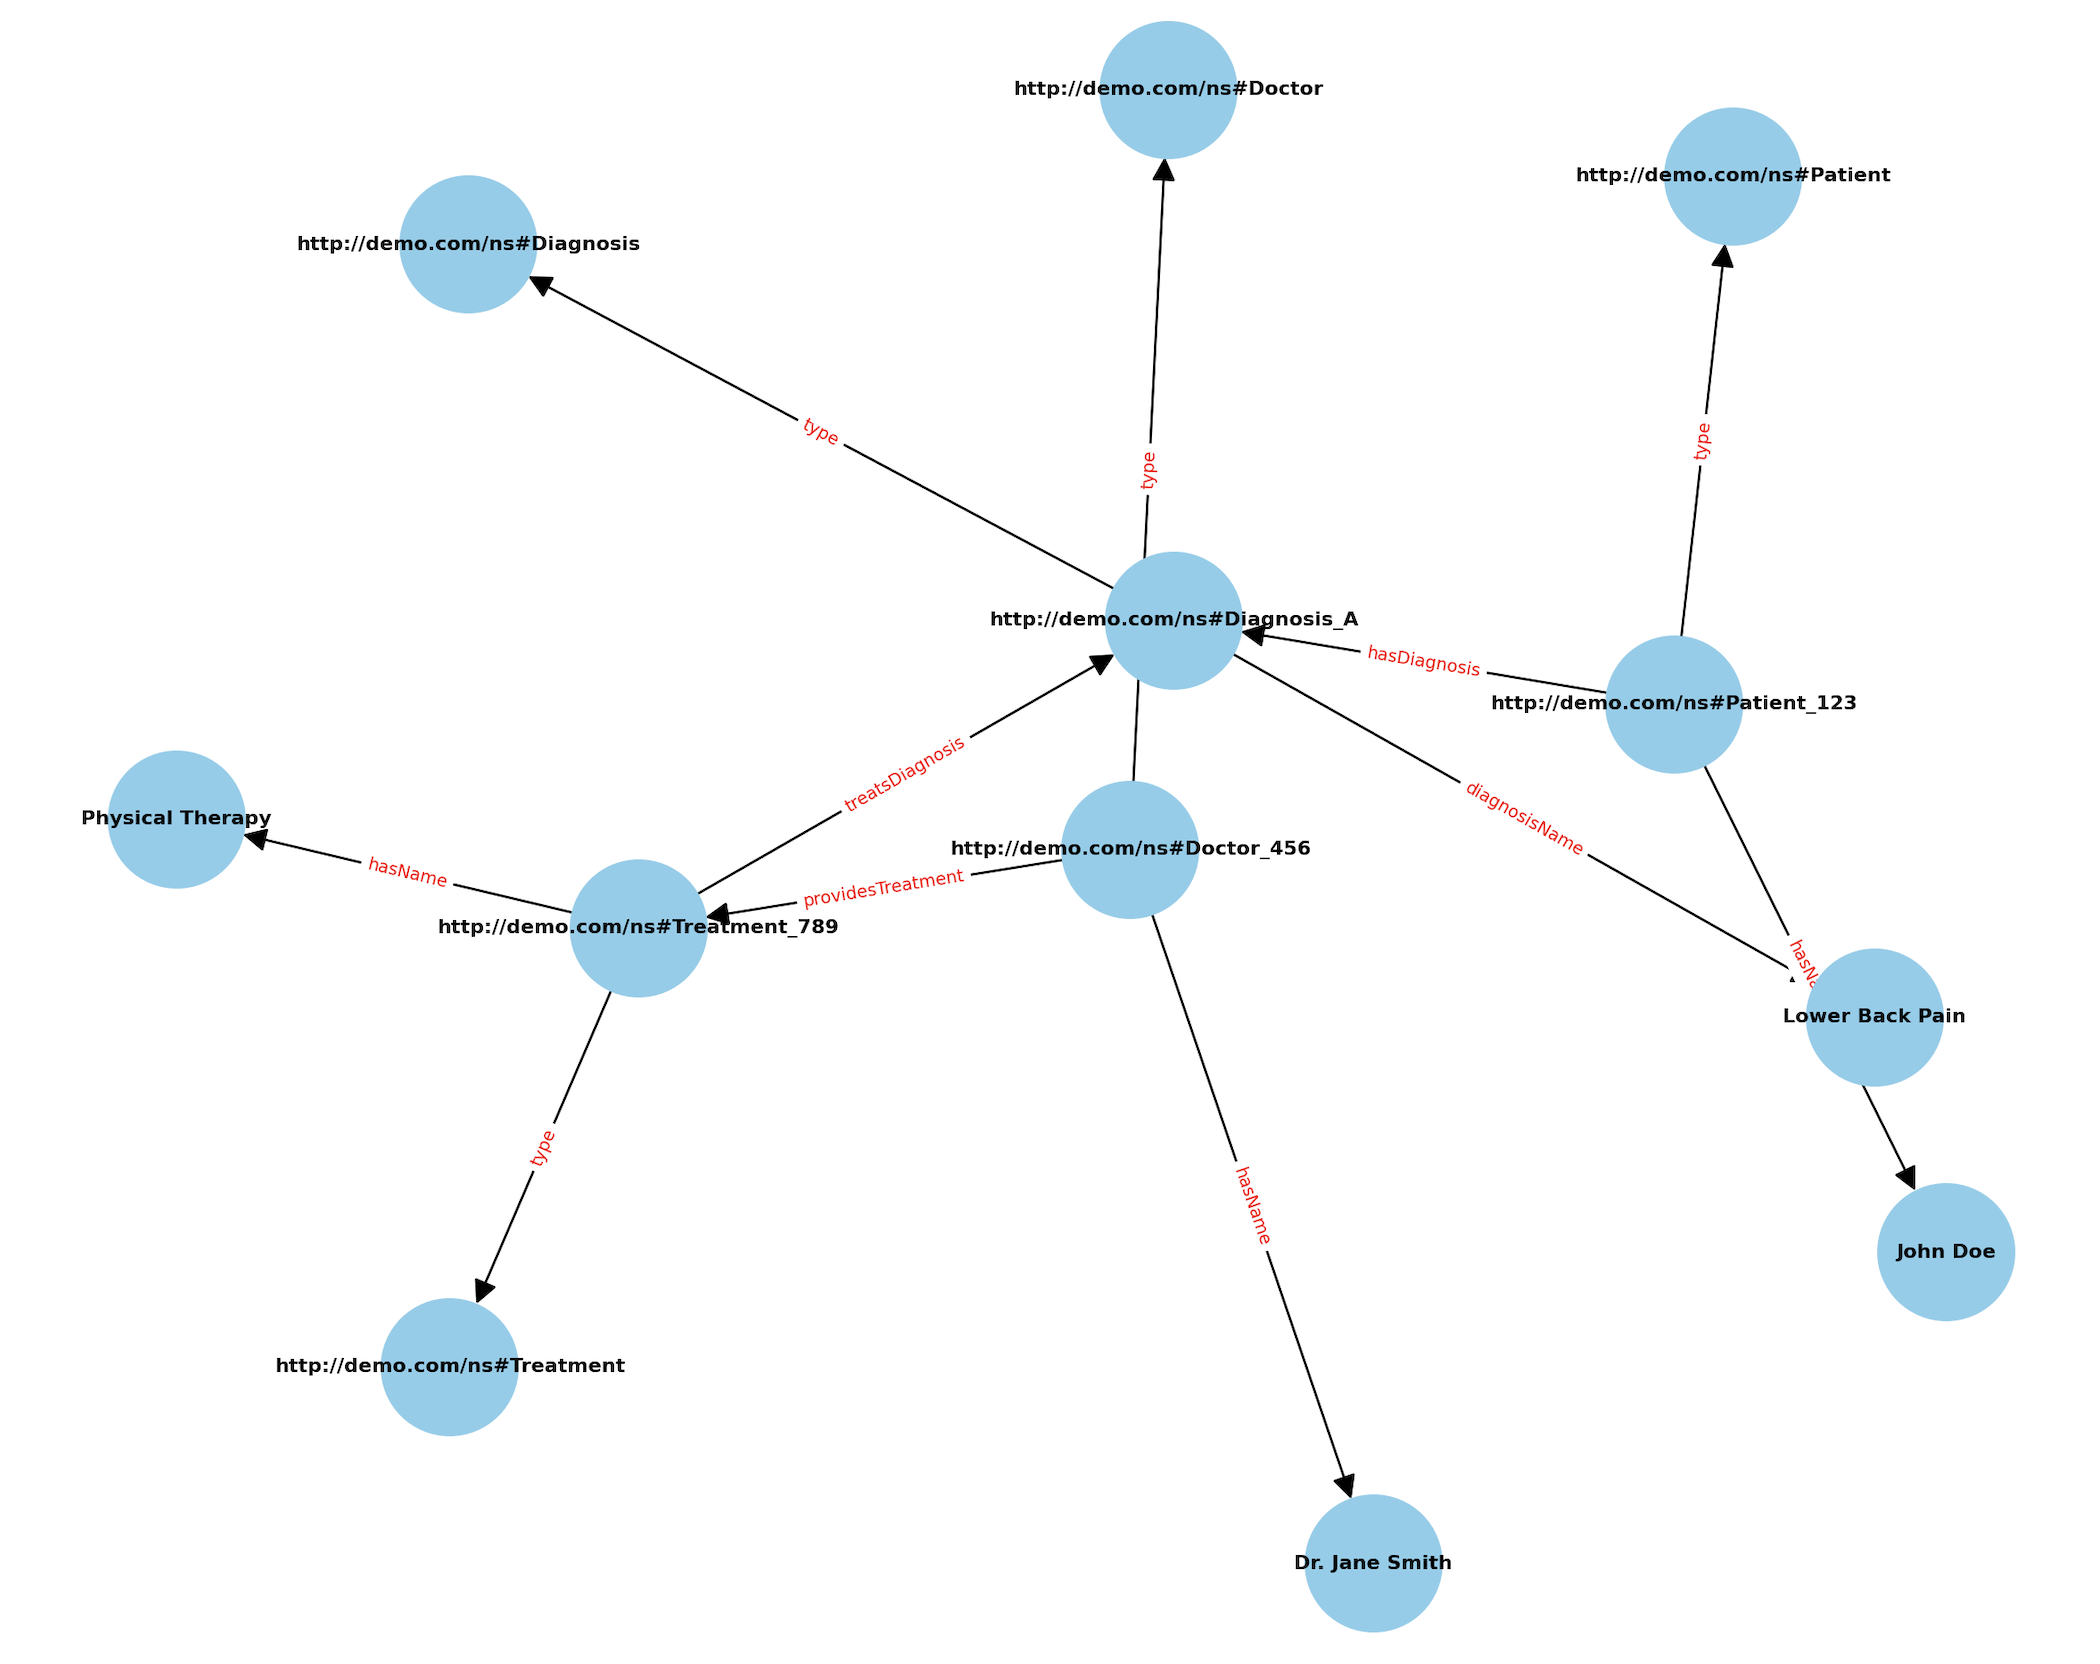

## Ask LLM with SKG 

In [ ]:
import requests
from rdflib import Graph


working_directory ="/Users/sujoy/Documents"
# Load RDF SKG
g = Graph()
g.parse(f"{working_directory}/healthcare_skg.ttl", format="turtle")

# Convert RDF graph to human-readable triples
triples_text = "\n".join([f"{s} {p} {o}" for s, p, o in g])

print(triples_text)
# Define your query to Ollama
query = "Who is the patient, what is their diagnosis, and what treatment is provided?"
query ="share care giver's name"
query ="only share the names and not include subject, include little story telling- who is providing care for which problem and to whom?"
query2 ="only share the names and not include subject - who is providing care for which problem and to whom?"
prompt = f"""
You are provided with a Semantic Knowledge Graph (SKG) in RDF triples format:
{triples_text}

Answer the following query based on the SKG:
{query}
"""

# Send the query to Ollama
response = requests.post("http://localhost:11434/api/generate", json={
    "model": "mistral",  # or your preferred model
    "prompt": prompt,
    "stream": False
})

answer = response.json().get('response')

print("Question =", query)
print("Inference from Ollama:")
print(answer.strip())


http://demo.com/ns#Doctor_456 http://demo.com/ns#providesTreatment http://demo.com/ns#Treatment_789
http://demo.com/ns#Patient_123 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://demo.com/ns#Patient
http://demo.com/ns#Patient_123 http://demo.com/ns#hasDiagnosis http://demo.com/ns#Diagnosis_A
http://demo.com/ns#Treatment_789 http://demo.com/ns#hasName Physical Therapy
http://demo.com/ns#Doctor_456 http://demo.com/ns#hasName Dr. Jane Smith
http://demo.com/ns#Diagnosis_A http://demo.com/ns#diagnosisName Lower Back Pain
http://demo.com/ns#Treatment_789 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://demo.com/ns#Treatment
http://demo.com/ns#Treatment_789 http://demo.com/ns#treatsDiagnosis http://demo.com/ns#Diagnosis_A
http://demo.com/ns#Patient_123 http://demo.com/ns#hasName John Doe
http://demo.com/ns#Doctor_456 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://demo.com/ns#Doctor
http://demo.com/ns#Diagnosis_A http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://demo.

## Cricket

In [10]:
from rdflib import Graph, Namespace, Literal, RDF, URIRef

# Define namespace
CRIC = Namespace("http://cricket.com/ns#")

# Initialize RDF graph
g = Graph()

# Create player entities
player1 = URIRef(CRIC["Sachin_Tendulkar"])
player2 = URIRef(CRIC["Shane_Warne"])
player3 = URIRef(CRIC["Brian_Lara"])

# Contries
team_india = URIRef(CRIC["India"])
team_australia = URIRef(CRIC["Australia"])
team_westindies = URIRef(CRIC["WestIndies"])

# Sachin Tendulkar attributes
g.add((player1, RDF.type, CRIC.Player))
g.add((player1, CRIC.name, Literal("Sachin Tendulkar")))
g.add((player1, CRIC.testBattingAverage, Literal(53.78)))
g.add((player1, CRIC.testWickets, Literal(46)))
g.add((player1, CRIC.catches, Literal(115)))
g.add((player1, CRIC.playsFor, team_india))

# Shane Warne attributes
g.add((player2, RDF.type, CRIC.Player))
g.add((player2, CRIC.name, Literal("Shane Warne")))
g.add((player2, CRIC.testBattingAverage, Literal(17.32)))
g.add((player2, CRIC.testWickets, Literal(708)))
g.add((player2, CRIC.catches, Literal(125)))
g.add((player2, CRIC.playsFor, team_australia))


# Brian Lara attributes
g.add((player3, RDF.type, CRIC.Player))
g.add((player3, CRIC.name, Literal("Brian Lara")))
g.add((player3, CRIC.testBattingAverage, Literal(52.88)))
g.add((player3, CRIC.testWickets, Literal(0)))
g.add((player3, CRIC.catches, Literal(164)))
g.add((player3, CRIC.playsFor, team_westindies))

# Matches and scores (relationships)
match1 = URIRef(CRIC["Match_INDvsAUS_2001"])
match2 = URIRef(CRIC["Match_WIvAUS_1999"])

# Define match entities
g.add((match1, RDF.type, CRIC.TestMatch))
g.add((match1, CRIC.team1, team_india))
g.add((match1, CRIC.team2, team_australia))

g.add((match2, RDF.type, CRIC.TestMatch))
g.add((match2, CRIC.team1, team_westindies))
g.add((match2, CRIC.team2, team_australia))

# Player participation
g.add((player1, CRIC.playedIn, match1))
g.add((player2, CRIC.playedIn, match1))

g.add((player2, CRIC.playedIn, match2))
g.add((player3, CRIC.playedIn, match2))

# Player scores in matches
g.add((player1, CRIC.scoredRuns, Literal(126)))
g.add((player2, CRIC.tookWickets, Literal(4)))

g.add((player3, CRIC.scoredRuns, Literal(153)))
g.add((player2, CRIC.tookWickets, Literal(5)))

# Save the RDF graph
g.serialize(destination=f"{working_directory}/cricket_skg.ttl", format="turtle")
print("Cricket RDF SKG created successfully!")


Cricket RDF SKG created successfully!


In [ ]:
import requests
from rdflib import Graph

# Load RDF graph
g = Graph()
g.parse(f"{working_directory}/cricket_skg.ttl", format="turtle")

# Convert RDF to readable format for LLM prompt
triples_text = "\n".join([f"{s} {p} {o}" for s, p, o in g])

print(triples_text)

query = "Who played in the match between West Indies and Australia, and what were their performances?"

prompt = f"""
You are provided a Cricket Semantic Knowledge Graph in RDF triples format:
{triples_text}

Answer this query clearly:
{query}
"""

# Query Ollama
response = requests.post("http://localhost:11434/api/generate", json={
    "model": "mistral",  # or any preferred local model
    "prompt": prompt,
    "stream": False
})

answer = response.json().get('response')
print("Inference from Ollama:")
print(answer.strip())


http://cricket.com/ns#Sachin_Tendulkar http://cricket.com/ns#catches 115
http://cricket.com/ns#Shane_Warne http://cricket.com/ns#catches 125
http://cricket.com/ns#Sachin_Tendulkar http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://cricket.com/ns#Player
http://cricket.com/ns#Shane_Warne http://cricket.com/ns#name Shane Warne
http://cricket.com/ns#Shane_Warne http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://cricket.com/ns#Player
http://cricket.com/ns#Shane_Warne http://cricket.com/ns#testBattingAverage 17.32
http://cricket.com/ns#Sachin_Tendulkar http://cricket.com/ns#name Sachin Tendulkar
http://cricket.com/ns#Shane_Warne http://cricket.com/ns#tookWickets 4
http://cricket.com/ns#Brian_Lara http://cricket.com/ns#playsFor http://cricket.com/ns#WestIndies
http://cricket.com/ns#Brian_Lara http://cricket.com/ns#scoredRuns 153
http://cricket.com/ns#Brian_Lara http://cricket.com/ns#catches 164
http://cricket.com/ns#Shane_Warne http://cricket.com/ns#playsFor http://cricket.com/ns#Aust